## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [ ]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [3]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0711 22:33:06.666595 10588 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 22:33:06.667595 10588 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 22:33:06.671595 10588 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [12]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0711 22:33:08.800717 10588 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0711 22:33:08.813718 10588 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0711 22:33:10.213798 10588 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0711 22:33:10.348805 10588 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 199us/step - loss: 1.9573 - acc: 0.2920 - val_loss: 1.8258 - val_acc: 0.3409
Epoch 2/100
50000/50000 [==============================] - 10s 197us/step - loss: 1.7254 - acc: 0.3809 - val_loss: 1.7129 - val_acc: 0.3915
Epoch 3/100
50000/50000 [==============================] - 11s 215us/step - loss: 1.6425 - acc: 0.4132 - val_loss: 1.6443 - val_acc: 0.4186
Epoch 4/100
50000/50000 [==============================] - 10s 197us/step - loss: 1.5703 - acc: 0.4417 - val_loss: 1.6094 - val_acc: 0.4182
Epoch 5/100
50000/50000 [==============================] - 9s 190us/step - loss: 1.5139 - acc: 0.4613 - val_loss: 1.4975 - val_acc: 0.4701
Epoch 6/100
50000/50000 [==============================] - 9s 186us/step - loss: 1.4778 - acc: 0.4740 - val_loss: 1.5337 - val_acc: 0.4536
Epoch 7/100
50000/50000 [==============================] - 10s 194us/step - loss: 1.4540 - acc: 0.4837 - val_los

50000/50000 [==============================] - 9s 188us/step - loss: 0.5440 - acc: 0.8069 - val_loss: 1.9727 - val_acc: 0.5155
Epoch 60/100
50000/50000 [==============================] - 9s 187us/step - loss: 0.5425 - acc: 0.8077 - val_loss: 2.0260 - val_acc: 0.5109 - loss: 0.5401 - acc:
Epoch 61/100
50000/50000 [==============================] - 9s 186us/step - loss: 0.5252 - acc: 0.8127 - val_loss: 2.0380 - val_acc: 0.5164 - acc: 0.81
Epoch 62/100
50000/50000 [==============================] - 9s 189us/step - loss: 0.5085 - acc: 0.8185 - val_loss: 2.0922 - val_acc: 0.5084
Epoch 63/100
50000/50000 [==============================] - 9s 187us/step - loss: 0.5124 - acc: 0.8158 - val_loss: 2.1423 - val_acc: 0.5133
Epoch 64/100
50000/50000 [==============================] - 9s 187us/step - loss: 0.5038 - acc: 0.8189 - val_loss: 2.1152 - val_acc: 0.5052
Epoch 65/100
50000/50000 [==============================] - 10s 190us/step - loss: 0.4995 - acc: 0.8212 - val_loss: 2.1210 - val_acc: 0.511

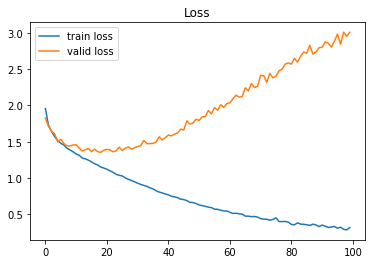

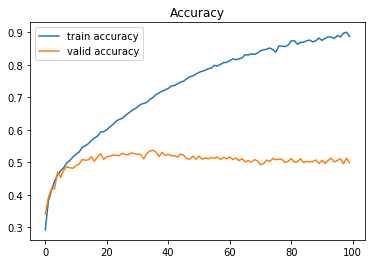

In [15]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()